In [1]:
pip install gudhi

You should consider upgrading via the '/Users/ryanhuang/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [66]:
import numpy as np
import gudhi as gd
import pandas as pd
import gudhi.representations
import matplotlib.pyplot as plt
import csv
import os
import heapq

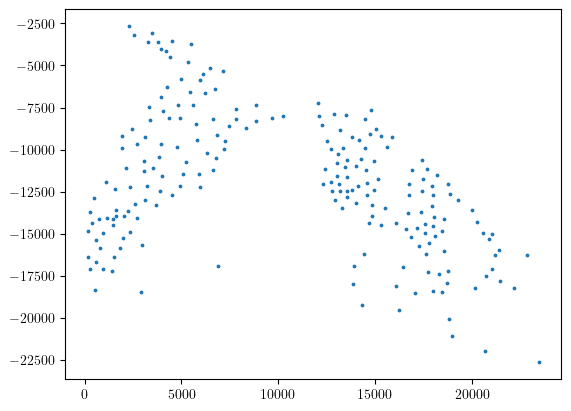

TCGA-BH-A18T-11A-02-TSB_1.csv
100    BRCA_Basal
Name: Subtype, dtype: object


In [57]:
# plot x, y
directory = '/Users/ryanhuang/Downloads/csv/'
files = os.listdir(directory)
fileQ = files[72]
f = os.path.join(directory, fileQ)
X = np.loadtxt(f, delimiter=',')
plt.scatter(X[:,0], X[:,1], s=3)
plt.show()
print(fileQ)
df1 = pd.read_csv("patient-subtype.csv")
df2=df1.loc[df1['Patient_ID'] == fileQ[0:12], 'Subtype']
print(df2)

In [4821]:
# f = os.path.join(directory, files[83])
df = pd.read_csv(f)

with open(f) as file_obj:
    reader_obj = list(csv.reader(file_obj))
    i = 0
    while i < len(reader_obj):
        if float(reader_obj[i][0]) > 10500:
            print(float(reader_obj[i][0]))
            reader_obj.remove(reader_obj[i])
        else:
            i+=1

np.savetxt(f,
        reader_obj,
        delimiter =", ",
        fmt ='% s')

10752.689207349506
10865.924829800924


[(1, (231218.21288391526, 713017.128707801)), (1, (376930.4357866156, 740398.0242177323)), (1, (204827.31071764632, 549172.0362354312)), (1, (216085.18826153217, 548502.2509451929)), (1, (1153757.9452299706, 1474056.6820874573))]
[[ 231218.21288392  713017.1287078 ]
 [ 376930.43578662  740398.02421773]
 [ 204827.31071765  549172.03623543]
 [ 216085.18826153  548502.25094519]
 [1153757.94522997 1474056.68208746]]


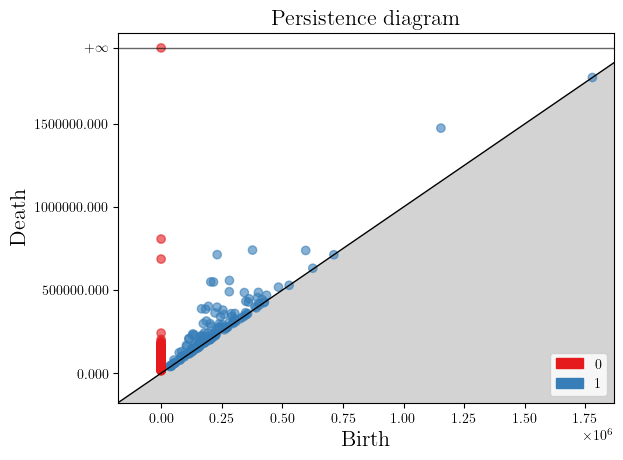

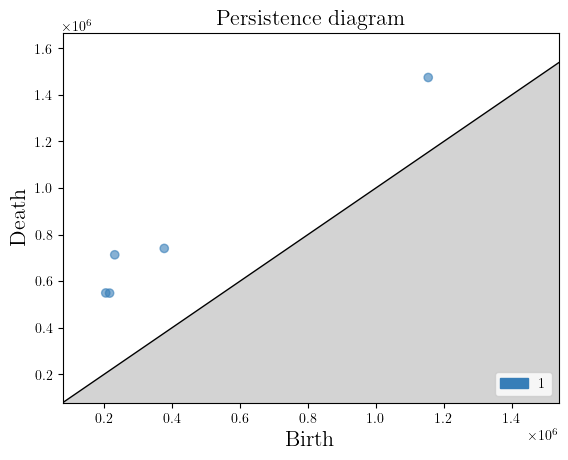

In [106]:
# make persistence diagram
acX = gd.AlphaComplex(points=X).create_simplex_tree()
dgmX = acX.persistence()
gd.plot_persistence_diagram(dgmX)
# heap = []
# top5 = []
# for point in dgmX:
#     if point[0] == 0:
#         continue
#     if len(heap) < 5:
#         heapq.heappush(heap, (point[1][1]-point[1][0], point))
#         top5.append(point)
#     elif len(heap) == 5 and point[1][1]-point[1][0] > heap[0][0]:
#         remove_pt = heapq.heappop(heap)[1]
#         top5.remove(remove_pt)
#         heapq.heappush(heap, (point[1][1]-point[1][0], point))
#         top5.append(point)
# gd.plot_persistence_diagram(top5)
# # x = []
# # y = []
# # for pt in acX.persistence_intervals_in_dimension(1):
# #     x.append(pt[0])
# #     y.append(pt[1])
# # plt.scatter(x,y)
# print(top5)
# a = []
# for pt in top5:
#     a.append([pt[1][0],pt[1][1]])
# a = np.array(a)
# print(a)

(1, 5000)


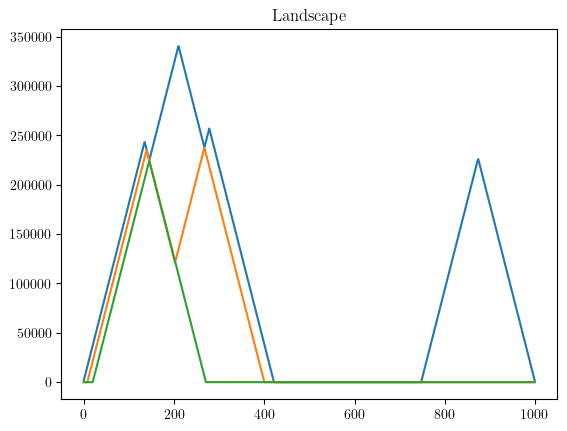

In [107]:
# make persistence landscape
LS = gd.representations.Landscape(resolution=1000)
# L = LS.fit_transform([acX.persistence_intervals_in_dimension(1)])
L = LS.fit_transform([a])
print(np.shape(L))
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])
plt.title("Landscape")
plt.show()

(1, 5000)


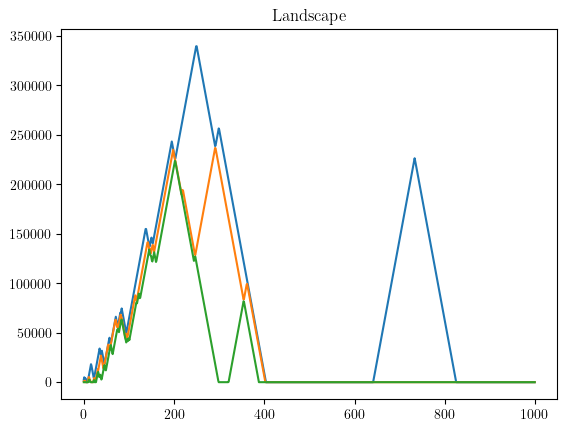

In [108]:
# make persistence landscape
LS = gd.representations.Landscape(resolution=1000)
L = LS.fit_transform([acX.persistence_intervals_in_dimension(1)])
print(np.shape(L))
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])
plt.title("Landscape")
plt.show()

In [60]:
a = gd.representations.PersistenceWeightedGaussianKernel()
b = a.fit_transform([acX.persistence_intervals_in_dimension(1)])
print(b)

[[90.55989765]]


In [9]:
df = pd.read_csv("patient-subtype.csv")
print(df)
df2=df.loc[df['Patient_ID'] == 'TCGA-BH-A1FH', 'Subtype']
print(df2)

        Patient_ID     Subtype                       Cancer Type  Unnamed: 3  \
0     TCGA-A1-A0SK  BRCA_Basal   Breast Invasive Carcinoma (NOS)         NaN   
1     TCGA-A1-A0SO  BRCA_Basal  Breast Invasive Ductal Carcinoma         NaN   
2     TCGA-A1-A0SP  BRCA_Basal  Breast Invasive Ductal Carcinoma         NaN   
3     TCGA-A2-A04P  BRCA_Basal  Breast Invasive Ductal Carcinoma         NaN   
4     TCGA-A2-A04Q  BRCA_Basal  Breast Invasive Ductal Carcinoma         NaN   
...            ...         ...                               ...         ...   
3830           NaN         NaN                               NaN         NaN   
3831           NaN         NaN                               NaN         NaN   
3832           NaN         NaN                               NaN         NaN   
3833           NaN         NaN                               NaN         NaN   
3834           NaN         NaN                               NaN         NaN   

      Unnamed: 4  Unnamed: 5  Unnamed: 

In [62]:
num_0 = 0
num_1 = 0
num_2 = 0
num_3 = 0
dgms, labels = [], []

directory = '/Users/ryanhuang/Downloads/csv/'
files = os.listdir(directory)

for filename in files:
    df2 = df.loc[df['Patient_ID'] == filename[0:12], 'Subtype']
    if df2.isin(["BRCA_Basal"]).any():
        num_0 += 1
        labels.append(0)
    elif df2.isin(["BRCA_Her2"]).any():
        num_1 += 1
        labels.append(1)
    elif df2.isin(["BRCA_LumA"]).any():
        num_2 += 1
        labels.append(2)
    elif df2.isin(["BRCA_LumB"]).any():
        num_3 += 1
        labels.append(3)
    else:
        continue
    f = os.path.join(directory, filename)
    X = np.loadtxt(f, delimiter=',')
    ac = gd.AlphaComplex(points=X).create_simplex_tree(max_alpha_square=1e12)
    dgm = ac.persistence()
    dgms.append(ac.persistence_intervals_in_dimension(1))

print(len(labels))
print(len(dgms))
print(np.shape(dgms[0]))

TCGA-BH-A1FH-11A-03-TS3_0.csv
TCGA-GM-A2D9-11A-03-TS3_1.csv
TCGA-XX-A899-11A-02-TS2_1.csv
TCGA-BH-A1ET-11A-02-TSB_0.csv
TCGA-BH-A18T-11A-03-TSC_0.csv
TCGA-BH-A1F0-11B-02-TSB_1.csv
TCGA-AC-A2FM-11B-02-TS2_1.csv
TCGA-BH-A1F6-11B-08-TSH_1.csv
TCGA-XX-A899-11A-04-TS4_0.csv
TCGA-E2-A106-01A-01-TS1_0.csv
TCGA-OL-A5RY-01Z-00-DX1_0.csv
TCGA-E9-A1N5-11A-02-TSB_0.csv
TCGA-BH-A1FG-11A-01-TSA_1.csv
TCGA-E9-A1RB-11A-02-TSB_0.csv
TCGA-AO-A03V-01A-01-TS1_0.csv
TCGA-E9-A1N5-11A-04-TSD_1.csv
TCGA-B6-A0X1-01A-01-BSA_1.csv
TCGA-A7-A26F-01B-03-BS3_0.csv
TCGA-B6-A0X1-01A-01-BSA_0.csv
TCGA-E9-A1N5-11A-04-TSD_0.csv
TCGA-AO-A03V-01A-01-TS1_1.csv
TCGA-E9-A1RB-11A-02-TSB_1.csv
TCGA-BH-A1FG-11A-01-TSA_0.csv
TCGA-E9-A1N5-11A-02-TSB_1.csv
TCGA-E2-A106-01A-01-TS1_1.csv
TCGA-XX-A899-11A-04-TS4_1.csv
TCGA-BH-A1F6-11B-08-TSH_0.csv
TCGA-AC-A2FM-11B-02-TS2_0.csv
TCGA-BH-A1F0-11B-02-TSB_0.csv
TCGA-BH-A18T-11A-03-TSC_1.csv
TCGA-BH-A1ET-11A-02-TSB_1.csv
TCGA-XX-A899-11A-02-TS2_0.csv
TCGA-GM-A2D9-11A-03-TS3_0.csv
TCGA-BH-A1

TCGA-B6-A0WS-01A-01-TS1_1.csv
TCGA-B6-A0WS-01A-01-TS1_0.csv
TCGA-BH-A0DQ-11A-01-BSA_0.csv
TCGA-AC-A23H-01Z-00-DX1_0.csv
TCGA-BH-A0BW-11A-02-TSB_0.csv
TCGA-BH-A18Q-11A-02-TSB_1.csv
TCGA-BH-A0DO-11A-01-TSA_1.csv
TCGA-AC-A2FO-11A-01-TSA_0.csv
TCGA-BH-A0C0-11A-02-BSB_0.csv
TCGA-BH-A209-01A-01-TSA_0.csv
TCGA-BH-A1EN-11A-02-TSB_1.csv
TCGA-AQ-A04L-01B-02-BSB_0.csv
TCGA-BH-A0B5-11A-02-TSB_0.csv
TCGA-LL-A5YL-01A-01-TS1_0.csv
TCGA-B6-A0RU-01A-01-TSA_0.csv
TCGA-AC-A2BK-11A-01-TSA_1.csv
TCGA-BH-A0BP-01A-01-BSA_0.csv
TCGA-AQ-A1H2-01A-01-TSA_0.csv
TCGA-BH-A1ES-11A-01-TSA_0.csv
TCGA-AO-A03R-01A-01-BS1_0.csv
TCGA-A7-A26E-01A-01-TSA_0.csv
TCGA-BH-A1FH-11B-02-TSB_0.csv
TCGA-A7-A26J-01B-01-BS1_0.csv
TCGA-E9-A1NF-11A-05-TSE_0.csv
TCGA-E2-A1B5-11A-01-TS1_1.csv
TCGA-BH-A0DD-11A-01-TSA_0.csv
TCGA-C8-A26W-01A-01-TSA_1.csv
TCGA-BH-A18S-11A-01-TSA_1.csv
TCGA-E9-A1NF-11A-04-TSD_1.csv
TCGA-A2-A1G1-01A-02-TSB_1.csv
TCGA-GM-A4E0-01A-01-TS1_1.csv
TCGA-GM-A5PX-01A-01-TS1_0.csv
TCGA-A7-A26G-01A-02-TSB_0.csv
TCGA-BH-A1

TCGA-BH-A1FJ-11B-03-TSC_0.csv
TCGA-AC-A3QP-01A-01-TS1_0.csv
TCGA-GM-A2DC-01A-01-TSA_1.csv
TCGA-AN-A041-01A-01-BS1_0.csv
TCGA-BH-A1FU-11B-02-TSB_0.csv
TCGA-BH-A0DO-11A-02-TSB_0.csv
TCGA-E2-A1IU-11A-01-TSA_0.csv
TCGA-BH-A1FB-11A-03-TSC_1.csv
TCGA-BH-A0BJ-11A-02-TSB_0.csv
TCGA-BH-A0C3-11A-02-TSB_1.csv
TCGA-BH-A0DD-11A-03-TSC_0.csv
TCGA-BH-A18S-11A-03-TSC_1.csv
TCGA-E2-A10C-01A-02-TSB_0.csv
TCGA-BH-A0BT-11A-02-BSB_1.csv
TCGA-BH-A0BT-11A-02-BSB_0.csv
TCGA-E2-A10C-01A-02-TSB_1.csv
TCGA-AC-A3OD-01A-01-TS1_0.csv
TCGA-BH-A18S-11A-03-TSC_0.csv
TCGA-A7-A26J-01B-02-BS2_0.csv
TCGA-BH-A0DD-11A-03-TSC_1.csv
TCGA-BH-A0BJ-11A-02-TSB_1.csv
TCGA-BH-A0C3-11A-02-TSB_0.csv
TCGA-BH-A1FB-11A-03-TSC_0.csv
TCGA-BH-A0DO-11A-02-TSB_1.csv
TCGA-BH-A1FU-11B-02-TSB_1.csv
TCGA-AN-A041-01A-01-BS1_1.csv
TCGA-GM-A2DC-01A-01-TSA_0.csv
TCGA-AC-A3QP-01A-01-TS1_1.csv
TCGA-E9-A1ND-11A-04-TSD_1.csv
TCGA-BH-A1FJ-11B-03-TSC_1.csv
TCGA-BH-A18Q-11A-01-TSA_1.csv
TCGA-BH-A1FR-11A-01-TS1_0.csv
TCGA-BH-A1FU-11B-03-TSC_0.csv
TCGA-BH-A1

In [35]:
test_size            = 0.2
perm                 = np.random.permutation(len(labels))
print(perm)
limit                = int(test_size * len(labels))
test_sub, train_sub  = perm[:limit], perm[limit:]
print(test_sub, train_sub)
train_labs           = np.array(labels)[train_sub]
print(train_labs)
test_labs            = np.array(labels)[test_sub]
train_dgms           = [dgms[i] for i in train_sub]
test_dgms            = [dgms[i] for i in test_sub]
print(labels.count(0), labels.count(1), labels.count(2), labels.count(3))

[425 171  33 365 506 163 258  65 376 131 333  23 198 204 487 122 379  91
 396 199 110 456 387 195  32 232 196 106 355 373 438 309 505 280 334 338
 112 210 153 117 305 264 329 200 332 494 361  53  80  28 453 285  84 281
 111  64 474  74   7 260 130 372 177 465 420 184 164   3 160 413 449 228
  17  78 392  96 214 121 324 126 533 215 245 417  42  76 115 410 272 247
 197 400 437 318 277  47 466 352  93 532 265 100  56  77 222 423 317 429
 303 118 143 114 266 448 239  90  92 339 445 483 389 493 151 102 325 213
 169 137 296 477 297 520 193 315 431 120 224 167 321 173 461 405 424 221
  63 248  13 407 492 346 526  66 275 360   1 238 496 347 469 250 241 524
 450 529 327 312 509 473   0 311 240  52 434  61 340 125 147 497 155 314
 531 135 218 128 175 351 385  35 330 308 236 390 235 464 292  99 255  25
 142 467 454 490  20 129 249 504 124 358 237  49 190 288 432 201  51 282
 279  67 108 500 291 253 172 459 158 415  30  38 202 323 104  12 234 217
  72 216 362 403 152 263   9 162  81  85 369 349 52

In [39]:
from sklearn.preprocessing   import MinMaxScaler
from sklearn.pipeline        import Pipeline
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier

# Definition of pipeline
pipe = Pipeline([("Separator", gd.representations.DiagramSelector(limit=np.inf, point_type="finite")),
                 ("Scaler",    gd.representations.DiagramScaler(scalers=[([0,1], MinMaxScaler())])),
                 ("TDA",       gd.representations.PersistenceImage()),
                 ("Estimator", SVC())])

# Parameters of pipeline. This is the place where you specify the methods you want to use to handle diagrams
param =    [
            {"Scaler__use":         [True],
             "TDA":                 [gd.representations.Landscape()], 
             "TDA__resolution":     [100],
             "Estimator":           [RandomForestClassifier()]}, 
            
            {"Scaler__use":         [True],
             "TDA":                 [gd.representations.Landscape()], 
             "TDA__resolution":     [1000],
             "Estimator":           [RandomForestClassifier()]},
    
            {"Scaler__use":         [True],
             "TDA":                 [gd.representations.Landscape()], 
             "TDA__resolution":     [100],
             "Estimator":           [SVC()]},
            
            {"Scaler__use":         [True],
             "TDA":                 [gd.representations.Landscape()], 
             "TDA__resolution":     [1000],
             "Estimator":           [SVC()]}
           ]

In [40]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(pipe, param, cv=3)

In [41]:
model = model.fit(train_dgms, train_labs)

In [42]:
print(model.best_params_)

{'Estimator': SVC(), 'Scaler__use': True, 'TDA': Landscape(), 'TDA__resolution': 100}


In [43]:
print("Train accuracy = " + str(model.score(train_dgms, train_labs)))
print("Test accuracy  = " + str(model.score(test_dgms,  test_labs)))

Train accuracy = 0.6074766355140186
Test accuracy  = 0.6415094339622641
